In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sklearn.preprocessing

  Obtaining dependency information for sklearn.preprocessing from https://files.pythonhosted.org/packages/4b/fc/b70d77dc1b80e0199efac9e4a6bc9e0812cdf74918106d6c06aafcfb5043/sklearn_preprocessing-0.1.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install statsmodels

In [ ]:
pip install sklearn.metrics

In [ ]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [2]:
#Load data
file_path = r"C:\Users\IvanSukhanov\Desktop\PhD\Classes\Energy\HW2\train.csv"
data = pd.read_csv(file_path)

#Check for missing data
missing_data = data.isnull().sum()
print("Missing data for each column:")
print(missing_data)

Missing data for each column:
time         0
temp         0
dwpt         0
rhum         0
snow      8305
wdir         0
wspd         0
wpgt         0
pres         0
price        0
demand      86
dtype: int64


In [5]:
#Fill missing values for 'snow' with 0 - no snowfall when missing
data['snow'] = data['snow'].fillna(0)

#Fill missing values for 'demand' with the median
data['demand'] = data['demand'].fillna(data['demand'].median())

In [6]:
#Statistical description
description = data.describe()
print("Statistical Description:")
print(description)

Statistical Description:
              temp         dwpt         rhum         snow         wdir  \
count  8424.000000  8424.000000  8424.000000  8424.000000  8424.000000   
mean      6.435708     2.228359    77.191121     1.106363   202.886633   
std       9.064983     8.053260    17.482734    11.885563    87.841014   
min     -26.100000   -28.700000    20.000000     0.000000     0.000000   
25%       0.300000    -3.000000    66.000000     0.000000   160.000000   
50%       6.000000     1.700000    83.000000     0.000000   210.000000   
75%      12.800000     8.400000    91.000000     0.000000   270.000000   
max      31.400000    20.900000   100.000000   220.000000   360.000000   

              wspd         wpgt         pres        price       demand  
count  8424.000000  8424.000000  8424.000000  8424.000000  8424.000000  
mean      9.132918    20.931588  1013.128063     0.156541     1.052860  
std       4.808481    10.003438    12.693745     0.112922     1.099834  
min       0.0000

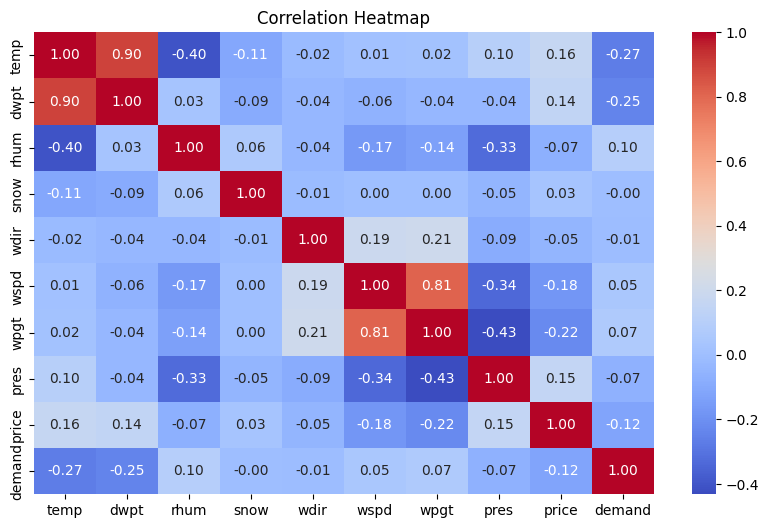

In [7]:
#Visualizations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

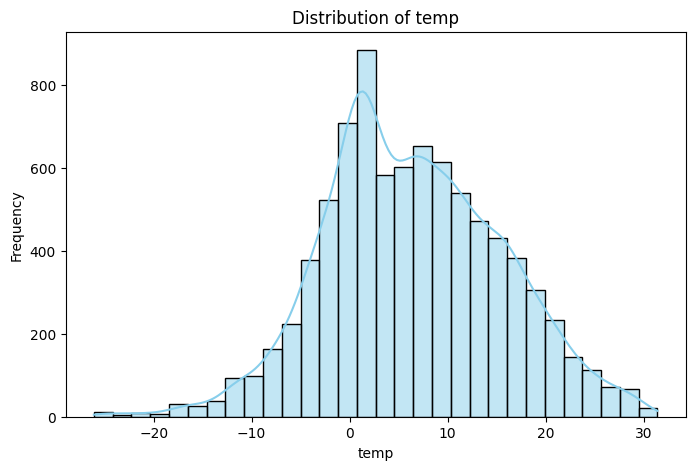

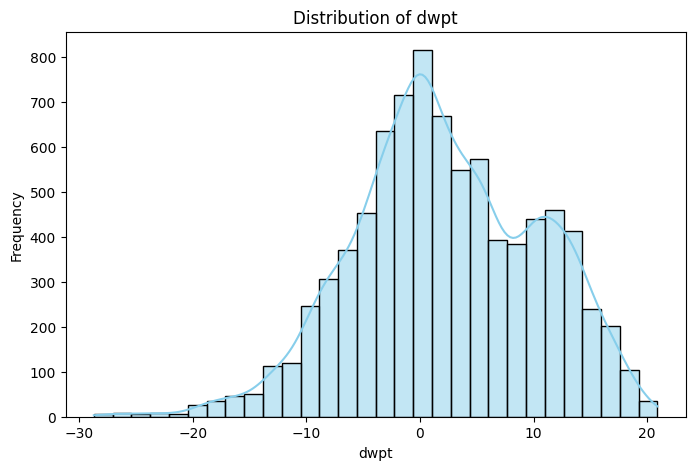

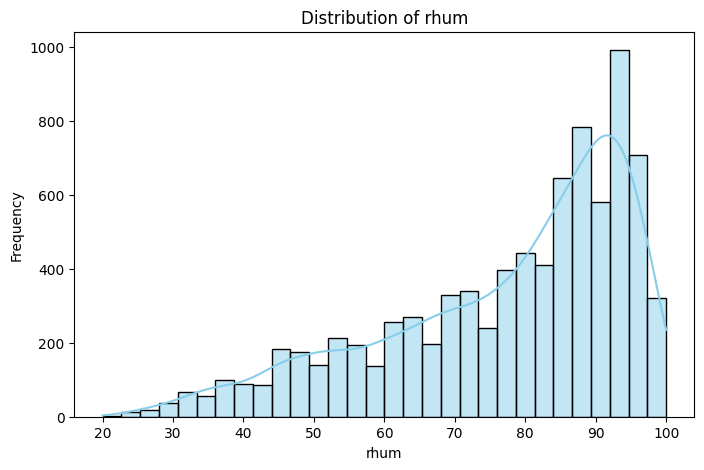

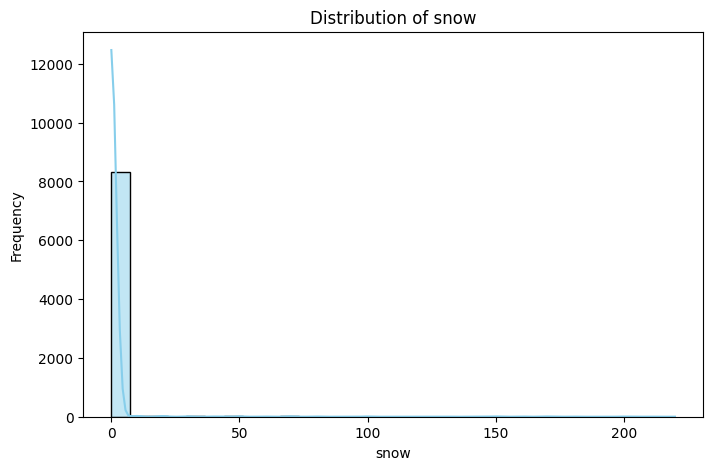

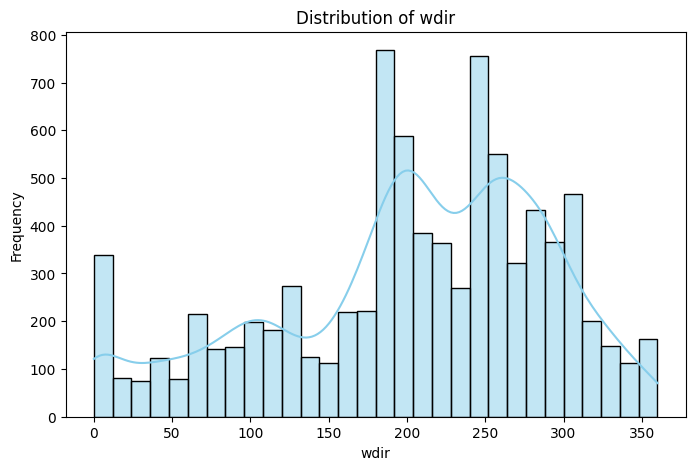

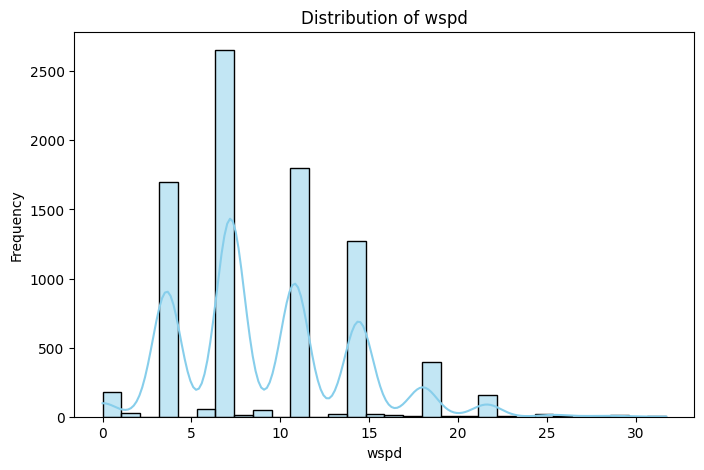

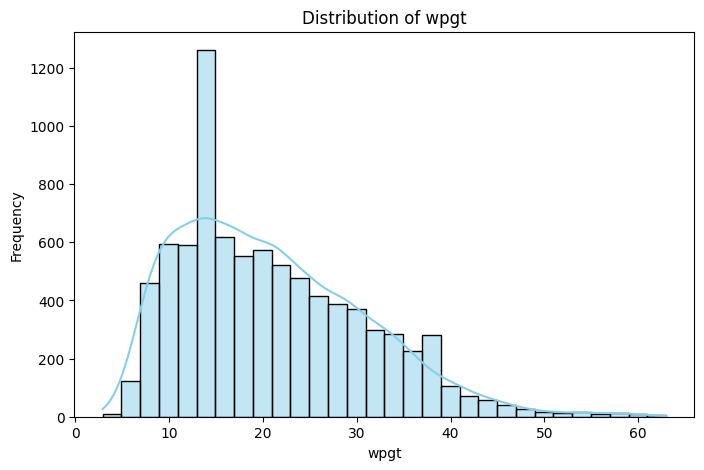

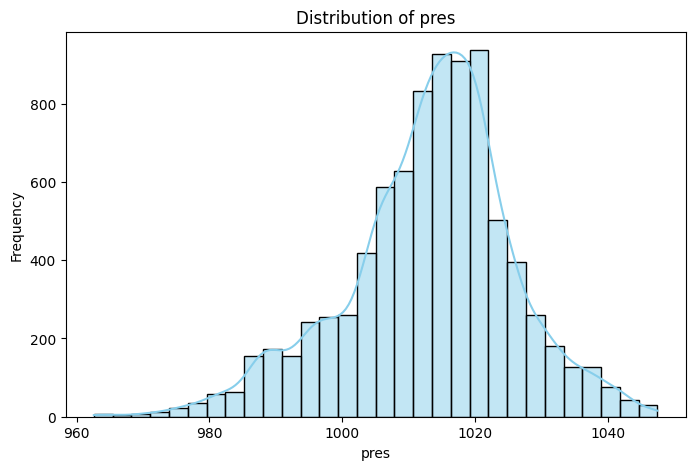

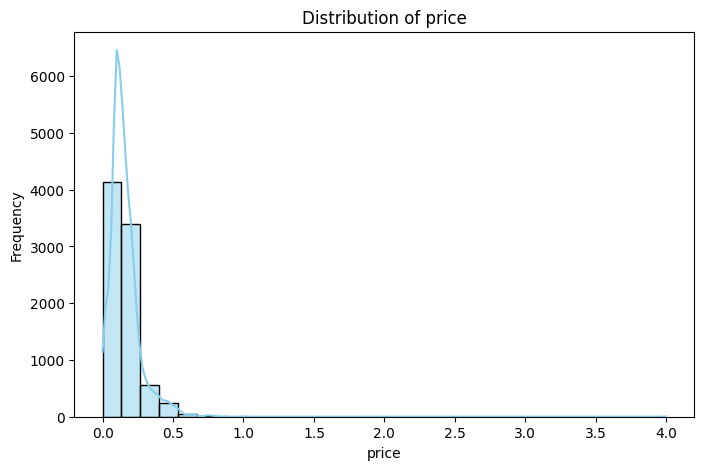

In [8]:
# Distributions of variables
variables_to_analyze = [col for col in data.columns if col != 'demand' and data[col].dtype in ['float64', 'int64']]

for var in variables_to_analyze:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[var], kde=True, color='skyblue', bins=30)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

In [15]:
!pip install scikit-learn

In [16]:
from sklearn.preprocessing import StandardScaler

In [20]:
#transformations/standardization
scaler = StandardScaler()
numerical_cols = [col for col in data.columns if data[col].dtype in ['float64', 'int64'] and col != 'demand']
data_scaled = data.copy()
data_scaled[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
from statsmodels.tsa.stattools import acf, pacf

ADF Test Statistic: -11.370282832972501
p-value: 9.014578325605461e-21


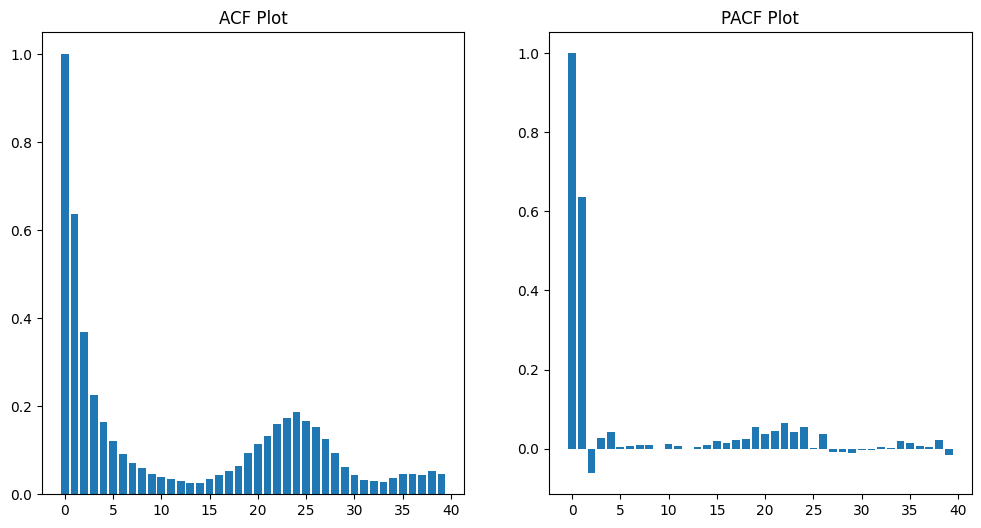

In [27]:
#stationarity,ACF/PACF for SARIMA
demand_series = data['demand']
adf_test = adfuller(demand_series)

print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# If not stationary, take the first difference
if adf_test[1] > 0.05:
    demand_diff = demand_series.diff().dropna()
else:
    demand_diff = demand_series

plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)
plt.title("ACF Plot")
plt.bar(range(len(acf(demand_diff))), acf(demand_diff))

# PACF Plot
plt.subplot(122)
plt.title("PACF Plot")
plt.bar(range(len(pacf(demand_diff))), pacf(demand_diff))

plt.show()

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
from sklearn.metrics import mean_absolute_error

In [32]:
#SARIMA Model
from statsmodels.tsa.arima.model import ARIMA  # Import ARIMA

sarima_model = ARIMA(demand_series, order=(1, 1, 1))
sarima_fit = sarima_model.fit()

sarima_pred = sarima_fit.predict(start=1, end=len(demand_series), dynamic=False)
sarima_pred = sarima_pred[:len(demand_series) - 1]  # Align with actual data
mae_sarima = mean_absolute_error(demand_series[1:], sarima_pred)
print("SARIMA Model MAE:", mae_sarima)


C:\Users\IvanSukhanov\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMA Model MAE: 0.49964260900893004


In [36]:
#SARIMAX Model with exog. features -temp, dwpt, price
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Import SARIMAX

exogenous_features = data_scaled[['temp', 'dwpt', 'price']].reindex(demand_series.index)
sarimax_model = SARIMAX(demand_series, exog=exogenous_features, order=(1, 1, 1))
sarimax_fit = sarimax_model.fit()

sarimax_pred = sarimax_fit.predict(start=1, end=len(demand_series) - 1, exog=exogenous_features.iloc[1:])
mae_sarimax = mean_absolute_error(demand_series[1:], sarimax_pred)
print("SARIMAX Model MAE with temp, dwpt, and price:", mae_sarimax)

C:\Users\IvanSukhanov\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX Model MAE with temp, dwpt, and price: 0.4917277660693816


In [38]:
#Comparison
print("\nModel Comparison:")
print(f"SARIMA MAE: {mae_sarima}")
print(f"SARIMAX MAE: {mae_sarimax}")

print("SARIMAX performs better with external factors - temp, dwpt, price.")



Model Comparison:
SARIMA MAE: 0.49964260900893004
SARIMAX MAE: 0.4917277660693816
SARIMAX performs better with external factors - temp, dwpt, price.


In [39]:
train_file_path = r"C:\Users\IvanSukhanov\Desktop\PhD\Classes\Energy\HW2\train.csv"
test_file_path = r"C:\Users\IvanSukhanov\Desktop\PhD\Classes\Energy\HW2\test.csv"

In [41]:
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

#Preprocess
train_data['snow'] = train_data['snow'].fillna(0)  
train_data['demand'] = train_data['demand'].fillna(train_data['demand'].median())
#Test
test_data['snow'] = test_data['snow'].fillna(0)  
test_data['demand'] = test_data['demand'].fillna(test_data['demand'].median()) 



In [43]:
#Standardize features
scaler = StandardScaler()
numerical_cols = ['temp', 'dwpt', 'price']
train_scaled = train_data.copy()
train_scaled[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_scaled = test_data.copy()
test_scaled[numerical_cols] = scaler.transform(test_data[numerical_cols])

#Exogenous features
exog_train = train_scaled[['temp', 'dwpt', 'price']]
exog_test = test_scaled[['temp', 'dwpt', 'price']]

In [44]:
#Train SARIMA and SARIMAX models
sarima_model = ARIMA(train_data['demand'], order=(1, 1, 1))
sarima_fit = sarima_model.fit()

sarimax_model = SARIMAX(train_data['demand'], exog=exog_train, order=(1, 1, 1))
sarimax_fit = sarimax_model.fit()

C:\Users\IvanSukhanov\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\IvanSukhanov\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [45]:
# Step 4: Rolling out-of-sample forecast
sarima_forecasts = []
sarimax_forecasts = []
naive_forecasts = []
actuals = []

for day in range(0, len(test_data), 24):  # Iterate day-by-day (24-hour blocks)
    # Actual data for the day
    actual_day = test_data['demand'].iloc[day:day + 24].values
    actuals.extend(actual_day)

    # SARIMA forecast
    sarima_forecast = sarima_fit.forecast(steps=24)
    sarima_forecasts.extend(sarima_forecast)

    # SARIMAX forecast
    sarimax_forecast = sarimax_fit.forecast(steps=24, exog=exog_test.iloc[day:day + 24])
    sarimax_forecasts.extend(sarimax_forecast)

    # Naïve forecast: Use the last value of the previous day
    last_known_value = train_data['demand'].iloc[-1] if day == 0 else test_data['demand'].iloc[day - 1]
    naive_forecast = [last_known_value] * 24
    naive_forecasts.extend(naive_forecast)

    # Update models with actual data (rolling forecast)
    train_data = pd.concat([train_data, test_data.iloc[day:day + 24]])
    exog_train = pd.concat([exog_train, exog_test.iloc[day:day + 24]])
    sarima_fit = ARIMA(train_data['demand'], order=(1, 1, 1)).fit()
    sarimax_fit = SARIMAX(train_data['demand'], exog=exog_train, order=(1, 1, 1)).fit()

C:\Users\IvanSukhanov\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\IvanSukhanov\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\IvanSukhanov\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\IvanSukhanov\miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible st

In [46]:
#MAE scores for each model
mae_sarima = mean_absolute_error(actuals, sarima_forecasts)
mae_sarimax = mean_absolute_error(actuals, sarimax_forecasts)
mae_naive = mean_absolute_error(actuals, naive_forecasts)

#results
print("SARIMA Model MAE:", mae_sarima)
print("SARIMAX Model MAE:", mae_sarimax)
print("Naïve Forecast MAE:", mae_naive)

SARIMA Model MAE: 0.3952955910046326
SARIMAX Model MAE: 0.4847597450815878
Naïve Forecast MAE: 0.4348392857142857


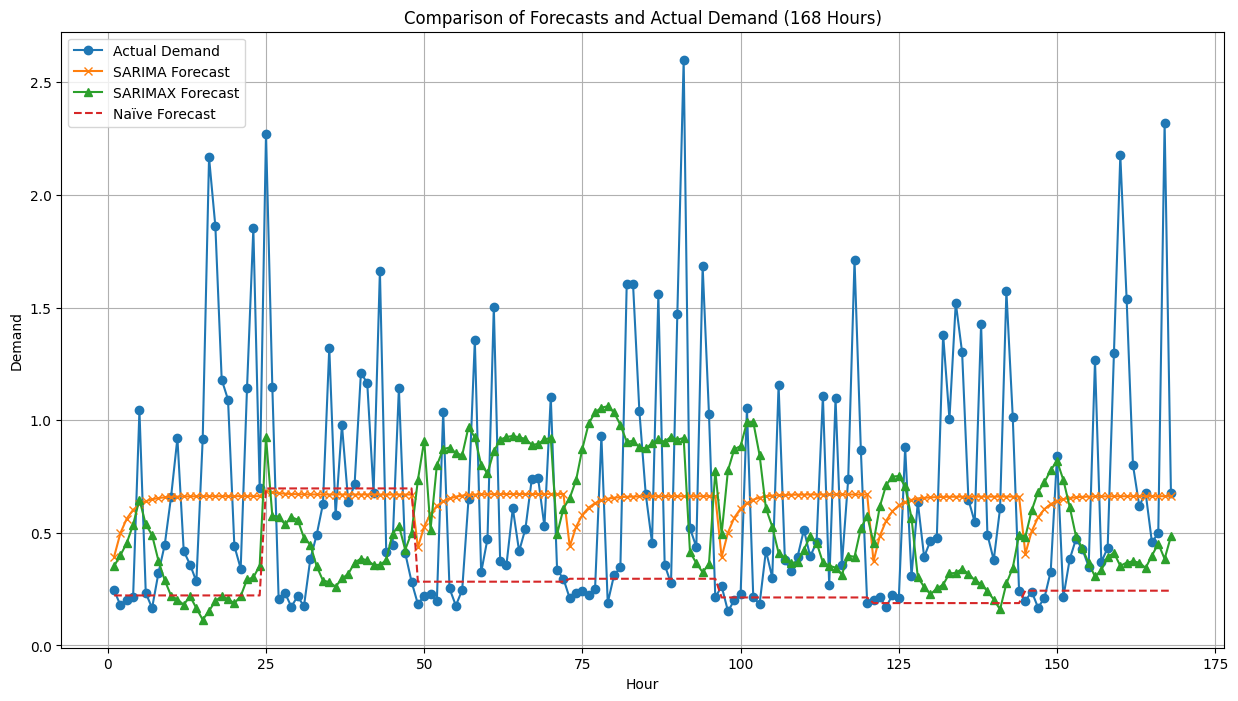

In [48]:
#168-hour forecast period
time_index_168 = range(1, 169)  # Hours 1 to 168
plt.figure(figsize=(15, 8))
plt.plot(time_index_168, actuals[:168], label="Actual Demand", marker='o')
plt.plot(time_index_168, sarima_forecasts[:168], label="SARIMA Forecast", marker='x')
plt.plot(time_index_168, sarimax_forecasts[:168], label="SARIMAX Forecast", marker='^')
plt.plot(time_index_168, naive_forecasts[:168], label="Naïve Forecast", linestyle='--')
plt.xlabel("Hour")
plt.ylabel("Demand")
plt.title("Comparison of Forecasts and Actual Demand (168 Hours)")
plt.legend()
plt.grid(True)
plt.show()